* Data Collection Reference: https://github.com/corazzon/cracking-the-pandas-cheat-sheet/blob/master/seoul-covid-19-01-read_html.ipynb
* Data analysis reference: https://github.com/corazzon/cracking-the-pandas-cheat-sheet/blob/master/seoul-covid-19-02-eda.ipynb

In [2]:
from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2020-08-25


In [3]:
import pandas as pd
import numpy as np

In [4]:
# target url for the covid19 data: Seoul City
url = "http://www.seoul.go.kr/coronaV/coronaStatus.do"
url

'http://www.seoul.go.kr/coronaV/coronaStatus.do'

In [5]:
# read all table datas in the web html template
tables = pd.read_html(url)
tables

[   종로구   중구  용산구  성동구  광진구  동대문구  중랑구  성북구  강북구  도봉구  노원구  은평구 서대문구
 0   49   41   88   80   60    98  106  209   77  108  120  141   65
 1  마포구  양천구  강서구  구로구  금천구  영등포구  동작구  관악구  서초구  강남구  송파구  강동구   기타
 2   99  114  166  121   53    94  116  182  113  145  193  104  244,
     종로구   중구  용산구  성동구  광진구 동대문구
 0    49   41   88   80   60   98
 1   중랑구  성북구  강북구  도봉구  노원구  은평구
 2   106  209   77  108  120  141
 3  서대문구  마포구  양천구  강서구  구로구  금천구
 4    65   99  114  166  121   53
 5  영등포구  동작구  관악구  서초구  강남구  송파구
 6    94  116  182  113  145  193
 7   강동구   기타  NaN  NaN  NaN  NaN
 8   104  244  NaN  NaN  NaN  NaN,
      소계  해외접촉관련  성북구사랑제일교회  여의도순복음교회  광화문집회관련  극단'산'관련  강남구판매업소(골드트레인)  \
 0  2986     382        471        24       47       26              33   
 
    강동구둔춘어린이집  노원구안디옥교회  FA체대입시학원  용인시우리제일교회  양천구되새김교회  리치웨이관련  이태원클럽관련  \
 0         15        22        30         65        11     119      139   
 
    구로구콜센터관련  타 시·도확진자접촉자   기타  경로확인중  
 0        98          111  948    445 

In [6]:
# index the table with covid19 patient data
tables[6]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,2986,미부여,8.23.,노원구,-,기타,NaN
1,2985,미부여,8.23.,노원구,-,여의도 순복음 교회,NaN
2,2984,17529,8.23.,성북구,-,기타,NaN
3,2983,미부여,8.23.,광진구,-,확인중,NaN
4,2982,미부여,8.23.,송파구,-,기타,NaN
...,...,...,...,...,...,...,...
2981,5,9,1.31.,성북구,-,#5 접촉,퇴원
2982,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
2983,3,6,1.30.,종로구,-,#3 접촉,퇴원
2984,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원


In [7]:
# get number of confirmed cases and numbers of columns
df = tables[6]
df.shape

(2986, 7)

In [8]:
# peek at the dataframe
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,2986,미부여,8.23.,노원구,-,기타,NaN
1,2985,미부여,8.23.,노원구,-,여의도 순복음 교회,NaN
2,2984,17529,8.23.,성북구,-,기타,NaN
3,2983,미부여,8.23.,광진구,-,확인중,NaN
4,2982,미부여,8.23.,송파구,-,기타,NaN


In [9]:
# number of patients involved in church
df_church = df[df['접촉력'].str.contains("교회")]
print(df_church.shape)
df_church.head()

(751, 7)


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
1,2985,미부여,8.23.,노원구,-,여의도 순복음 교회,NaN
25,2961,17570,8.23.,영등포구,-,여의도 순복음 교회,NaN
33,2953,17602,8.23.,노원구,-,성북구 사랑제일교회 관련,NaN
37,2949,17467,8.23.,동대문구,-,여의도 순복음 교회,NaN
49,2937,17514,8.23.,양천구,-,여의도 순복음 교회,NaN


In [10]:
df_etc = df[df['접촉력'].str.contains("기타")]
print(df_etc.shape)
df_etc.sample(15)

(163, 7)


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
545,2441,16206,8.19.,동대문(구,-,기타,NaN
50,2936,17608,8.23.,종로구,-,기타,NaN
749,2237,15800,8.18.,성동구,-,기타,NaN
349,2637,16769,8.21.,동대문구,-,기타,NaN
461,2525,16619,8.20.,송파구,-,기타,NaN
389,2597,16318,8.20.,강서구,-,기타,NaN
518,2468,미부여,8.19.,송파구,-,기타,NaN
334,2652,16727,8.21.,금천구,-,기타,NaN
620,2366,16101,8.19.,동작구,-,기타,NaN
603,2383,16244,8.19.,송파구,-,기타,NaN


In [11]:
# most upto-date data
last_day = df.loc[0, "확진일"]
last_day = last_day.replace(".", "_")
last_day

'8_23_'

In [12]:
# naming file and setting the path
dataset_path = "./dataset/"
file_name = f"seoul_covid_{last_day}.csv"
file_path = dataset_path + file_name
file_path

'./dataset/seoul_covid_8_23_.csv'

In [13]:
df.to_csv(file_path, index=False)

In [14]:
# reed the covid dataset
pd.read_csv(file_path)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,2986,미부여,8.23.,노원구,-,기타,NaN
1,2985,미부여,8.23.,노원구,-,여의도 순복음 교회,NaN
2,2984,17529,8.23.,성북구,-,기타,NaN
3,2983,미부여,8.23.,광진구,-,확인중,NaN
4,2982,미부여,8.23.,송파구,-,기타,NaN
...,...,...,...,...,...,...,...
2981,5,9,1.31.,성북구,-,#5 접촉,퇴원
2982,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
2983,3,6,1.30.,종로구,-,#3 접촉,퇴원
2984,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원


In [15]:
# sort according to the patient number
df = df.sort_values(["연번"], ascending=False)
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,2986,미부여,8.23.,노원구,-,기타,NaN
1,2985,미부여,8.23.,노원구,-,여의도 순복음 교회,NaN
2,2984,17529,8.23.,성북구,-,기타,NaN
3,2983,미부여,8.23.,광진구,-,확인중,NaN
4,2982,미부여,8.23.,송파구,-,기타,NaN


In [16]:
# count the number of daily confirmed cases
df["확진일"].value_counts()

8.18.    151
8.15.    146
8.22.    140
8.19.    135
8.17.    132
        ... 
5.31.      1
3.5.       1
4.18.      1
2.7.       1
5.17.      1
Name: 확진일, Length: 185, dtype: int64

In [17]:
df["확진일"].head(4)

0    8.23.
1    8.23.
2    8.23.
3    8.23.
Name: 확진일, dtype: object

In [18]:
# transform date(string) into datetime object
df["확진일자"] = pd.to_datetime("2020"+"-"+df["확진일"].str.replace(".","-"))
df["확진일자"].head()

0   2020-08-23
1   2020-08-23
2   2020-08-23
3   2020-08-23
4   2020-08-23
Name: 확진일자, dtype: datetime64[ns]

In [19]:
# extract month, add column for the month
df["월"] = df["확진일자"].dt.month

In [20]:
# extract week, add column for the week
df["주"] = df["확진일자"].dt.week

In [21]:
# make a new column "월일" with datetime format
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
df.head(3)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,2986,미부여,8.23.,노원구,-,기타,NaN,2020-08-23,8,34,08-23
1,2985,미부여,8.23.,노원구,-,여의도 순복음 교회,NaN,2020-08-23,8,34,08-23
2,2984,17529,8.23.,성북구,-,기타,NaN,2020-08-23,8,34,08-23


## Visualization

In [22]:
import matplotlib.pyplot as plt

# font designation
plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
plt.style.use("fivethirtyeight")

In [23]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

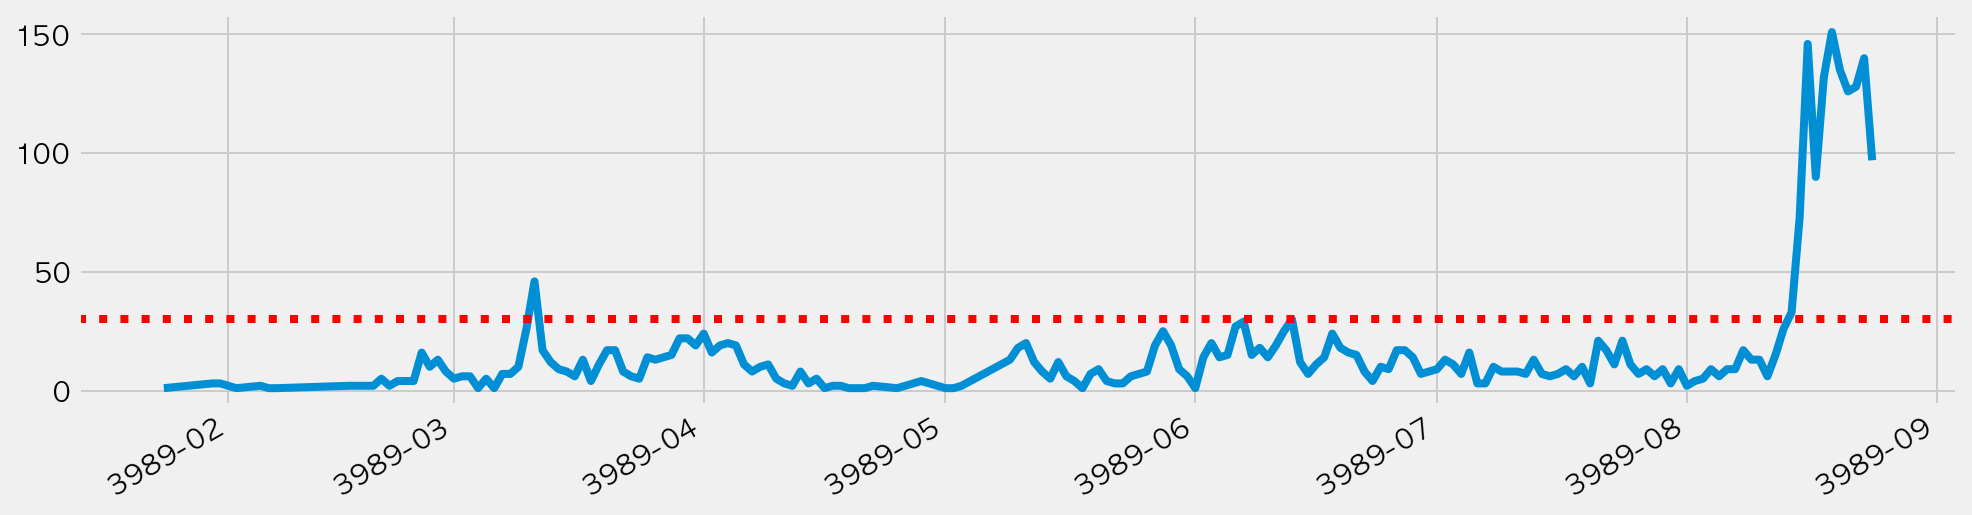

In [24]:
# plot total number of patients graph
df["확진일자"].value_counts().sort_index().plot(figsize=(15,4), rot=30, grid=True)
plt.axhline(30, linestyle=":", color="red")

In [25]:
df.head(4)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,2986,미부여,8.23.,노원구,-,기타,NaN,2020-08-23,8,34,08-23
1,2985,미부여,8.23.,노원구,-,여의도 순복음 교회,NaN,2020-08-23,8,34,08-23
2,2984,17529,8.23.,성북구,-,기타,NaN,2020-08-23,8,34,08-23
3,2983,미부여,8.23.,광진구,-,확인중,NaN,2020-08-23,8,34,08-23


In [26]:
# take a peek at daily confirmed cases statistics
# 'count' is number of days elasped since covid19 outbreak. Rest of statistics are involved with confirmed cases.
day_count = df["월일"].value_counts().sort_index()
day_count.describe()

count    184.000000
mean      16.228261
std       27.033921
min        1.000000
25%        5.000000
50%        9.000000
75%       16.000000
max      151.000000
Name: 월일, dtype: float64

In [27]:
# get 10 days of recent confirmed cases
day_count[-10:]

08-14     73
08-15    146
08-16     90
08-17    132
08-18    151
08-19    135
08-20    126
08-21    128
08-22    140
08-23     97
Name: 월일, dtype: int64

In [28]:
# get maximum number of confirmed cases
day_count[day_count == day_count.max()]

08-18    151
Name: 월일, dtype: int64

In [29]:
# get dataframe corresponding to a selected date
df_day = df[df["월일"]=="08-13"]
df_day.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
1218,1768,14876,8.13.,은평구,-,은평구 확진자 접촉,NaN,2020-08-13,8,33,08-13
1219,1767,14853,8.13.,광진구,-,롯데리아 종사자 모임,NaN,2020-08-13,8,33,08-13
1220,1766,14846,8.13.,은평구,-,은평구 확진자 접촉,NaN,2020-08-13,8,33,08-13
1221,1765,14848,8.13.,성북구,-,성북구 사랑제일교회 관련,NaN,2020-08-13,8,33,08-13
1222,1764,14842,8.13.,강북구,-,성북구 사랑제일교회 관련,NaN,2020-08-13,8,33,08-13


In [30]:
# Covid19 infection classified with patients' contact to the disease
df["접촉력"].value_counts().head(20)

성북구 사랑제일교회 관련    469
해외 접촉 추정         352
확인중              242
확인 중             209
기타               163
이태원 클럽 관련        139
리치웨이 관련          119
타시도 확진자 접촉       106
용인시 우리제일교회 관련     65
구로구 콜센터 관련        60
광화문 집회            47
양천구 운동시설 관련       43
요양시설 관련           43
구로구 교회 관련         41
콜센터직원 접촉          37
수도권 개척교회 관련       37
강남구 사무실 관련        36
왕성교회 관련           30
동대문구 관련           28
FA체대 입시학원관련       27
Name: 접촉력, dtype: int64

In [31]:
# get unique value for types of contagion route 
df["접촉력"].unique()

array(['기타', '여의도 순복음 교회', '확인중', '광화문 집회', '극단산관련', '강남구 판매업소(골드트레인)',
       '타시도 확진자 접촉', '성북구 사랑제일교회 관련', '극단 산 관련', '확인 중', '노원구 안디옥교회',
       '롯데리아 종사자 모임', 'FA체대 입시학원관련', '해외', '은평구 성경공부모임', '용인시 우리제일교회 관련',
       '관악구 요양병원', '고대안암병원관련', '마포구 푸본현대생명콜센터관련', '성동구 가족관련',
       '강동구 둔촌푸르지오어린이집', 'FA체대 입시학원 관련', '양천구 되새김교회', '영등포 IFC몰 오케스트로 관련',
       '해외 접촉 추정', '성동구 확진자 접촉', '용산구 확진자 접촉', '강북구 확진자 접촉', '도봉구 확진자 접촉',
       '동대문 확진자 접촉', '#14678 접촉', '광진구 확진자 접촉', '서초구 확진자 접촉',
       '동대문구 확진자 접촉', '구로구 확진자 접촉', '은평구 확진자 접촉', '노원구 확진자 접촉',
       '고양시 반석교회 관련(케네디상가)', '중구 통일상가', '양천구 확진자 접촉', '영등포구 확진자 접촉',
       '강남구 확진자 접촉', '강남구 판매업소', '종로구 확진자 접촉', '성북구 확진자 접촉', '마포구 확진자 접촉',
       '#14483 접촉', '#14488 접촉', '도봉구 가족관련', '강남구 커피전문점', '선교회 소모임',
       '송파구 교회관련', '강서구 확진자 접촉', '송파구 확진자 접촉', '종로구 지인모임 신명투자',
       '강서구 요양시설관련', '강남구 사무실 K빌딩', '송파구 지인모임', '관악구 확진자 접촉', '중구 확진자 접촉',
       '관악구 사무실 관련', '강남구 사무실 관련', '동작구 확진자 접촉', '강남역삼동 금융회사',
       '강서구 요양시설 관련', '강남구 이동통신

In [32]:
# get two arrays of unknown route for contagion (미확인경로 확진자)
df.loc[df["접촉력"].str.contains("확인"),"접촉력"].unique()

array(['확인중', '확인 중'], dtype=object)

In [33]:
# overwrite whatever cell value that contains "확인" as "미확인"
df.loc[df["접촉력"].str.contains("확인"),"접촉력"] = "미확인"
# overwrite whatever cell value that contains "기타" as "미확인"
df.loc[df["접촉력"].str.contains("기타"),"접촉력"] = "미확인"
# check whether those two arrays are combined
df.loc[df["접촉력"].str.contains("확인"),"접촉력"].unique()

array(['미확인'], dtype=object)

In [34]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,2986,미부여,8.23.,노원구,-,미확인,NaN,2020-08-23,8,34,08-23
1,2985,미부여,8.23.,노원구,-,여의도 순복음 교회,NaN,2020-08-23,8,34,08-23
2,2984,17529,8.23.,성북구,-,미확인,NaN,2020-08-23,8,34,08-23
3,2983,미부여,8.23.,광진구,-,미확인,NaN,2020-08-23,8,34,08-23
4,2982,미부여,8.23.,송파구,-,미확인,NaN,2020-08-23,8,34,08-23


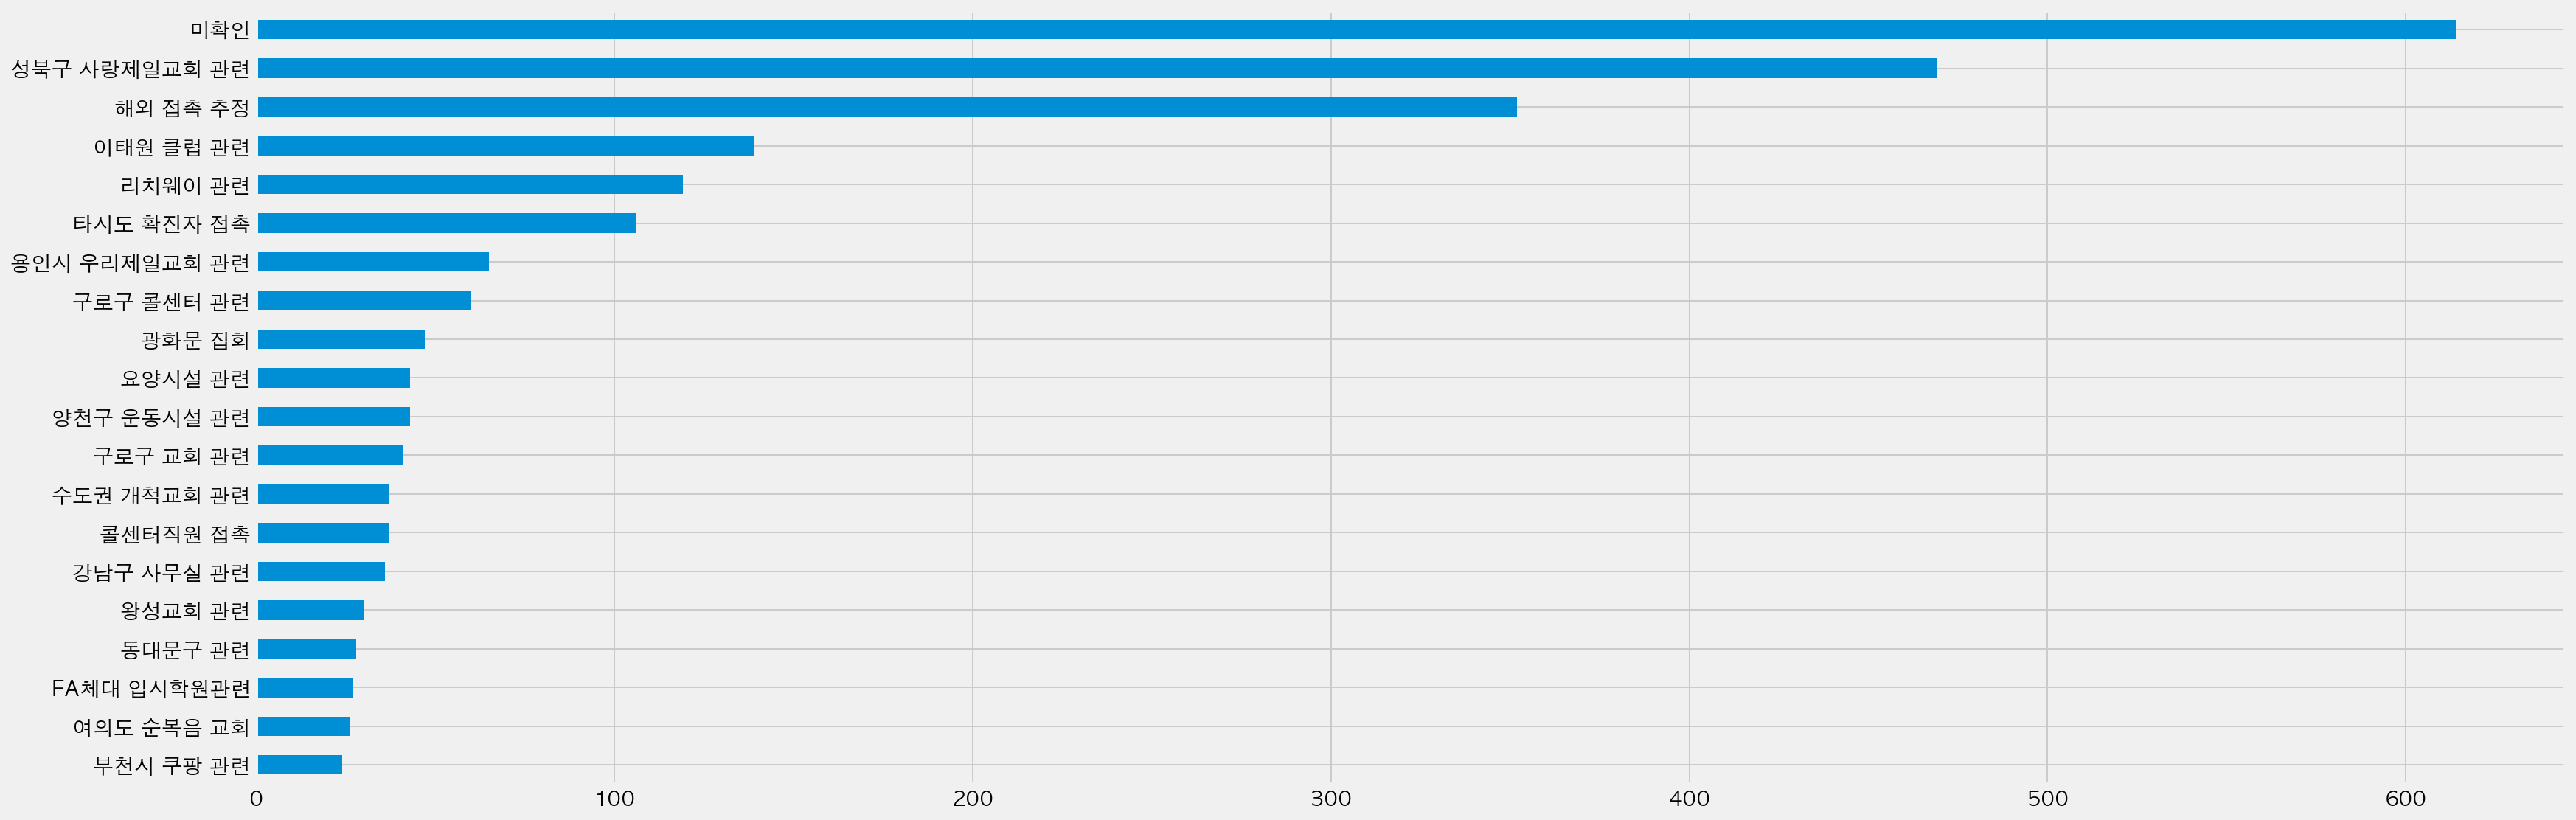

In [52]:
contact_count = df["접촉력"].value_counts()
contact_count_top = contact_count.sort_values().tail(20)
g = contact_count_top.plot.barh(figsize=(25,9))

In [53]:
figure_ranked = g.get_figure()
figure_ranked.savefig("./img/confirmed_path_rank.png")


In [37]:
top_contact = df["접촉력"].value_counts().head(15)
top_contact

미확인              614
성북구 사랑제일교회 관련    469
해외 접촉 추정         352
이태원 클럽 관련        139
리치웨이 관련          119
타시도 확진자 접촉       106
용인시 우리제일교회 관련     65
구로구 콜센터 관련        60
광화문 집회            47
요양시설 관련           43
양천구 운동시설 관련       43
구로구 교회 관련         41
수도권 개척교회 관련       37
콜센터직원 접촉          37
강남구 사무실 관련        36
Name: 접촉력, dtype: int64

## 감염경로 불명

In [38]:
df_untracked = df[df["접촉력"]=="미확인"]
df_untracked

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,2986,미부여,8.23.,노원구,-,미확인,NaN,2020-08-23,8,34,08-23
2,2984,17529,8.23.,성북구,-,미확인,NaN,2020-08-23,8,34,08-23
3,2983,미부여,8.23.,광진구,-,미확인,NaN,2020-08-23,8,34,08-23
4,2982,미부여,8.23.,송파구,-,미확인,NaN,2020-08-23,8,34,08-23
5,2981,17622,8.23.,양천구,-,미확인,NaN,2020-08-23,8,34,08-23
...,...,...,...,...,...,...,...,...,...,...,...
2930,56,1611,2.25.,고양시,-,미확인,퇴원,2020-02-25,2,9,02-25
2944,42,996,2.25.,노원구,-,미확인,퇴원,2020-02-25,2,9,02-25
2947,39,907,2.25.,평택시,-,미확인,퇴원,2020-02-25,2,9,02-25
2948,38,935,2.25.,관악구,-,미확인,퇴원,2020-02-25,2,9,02-25


<AxesSubplot:xlabel='월,주'>

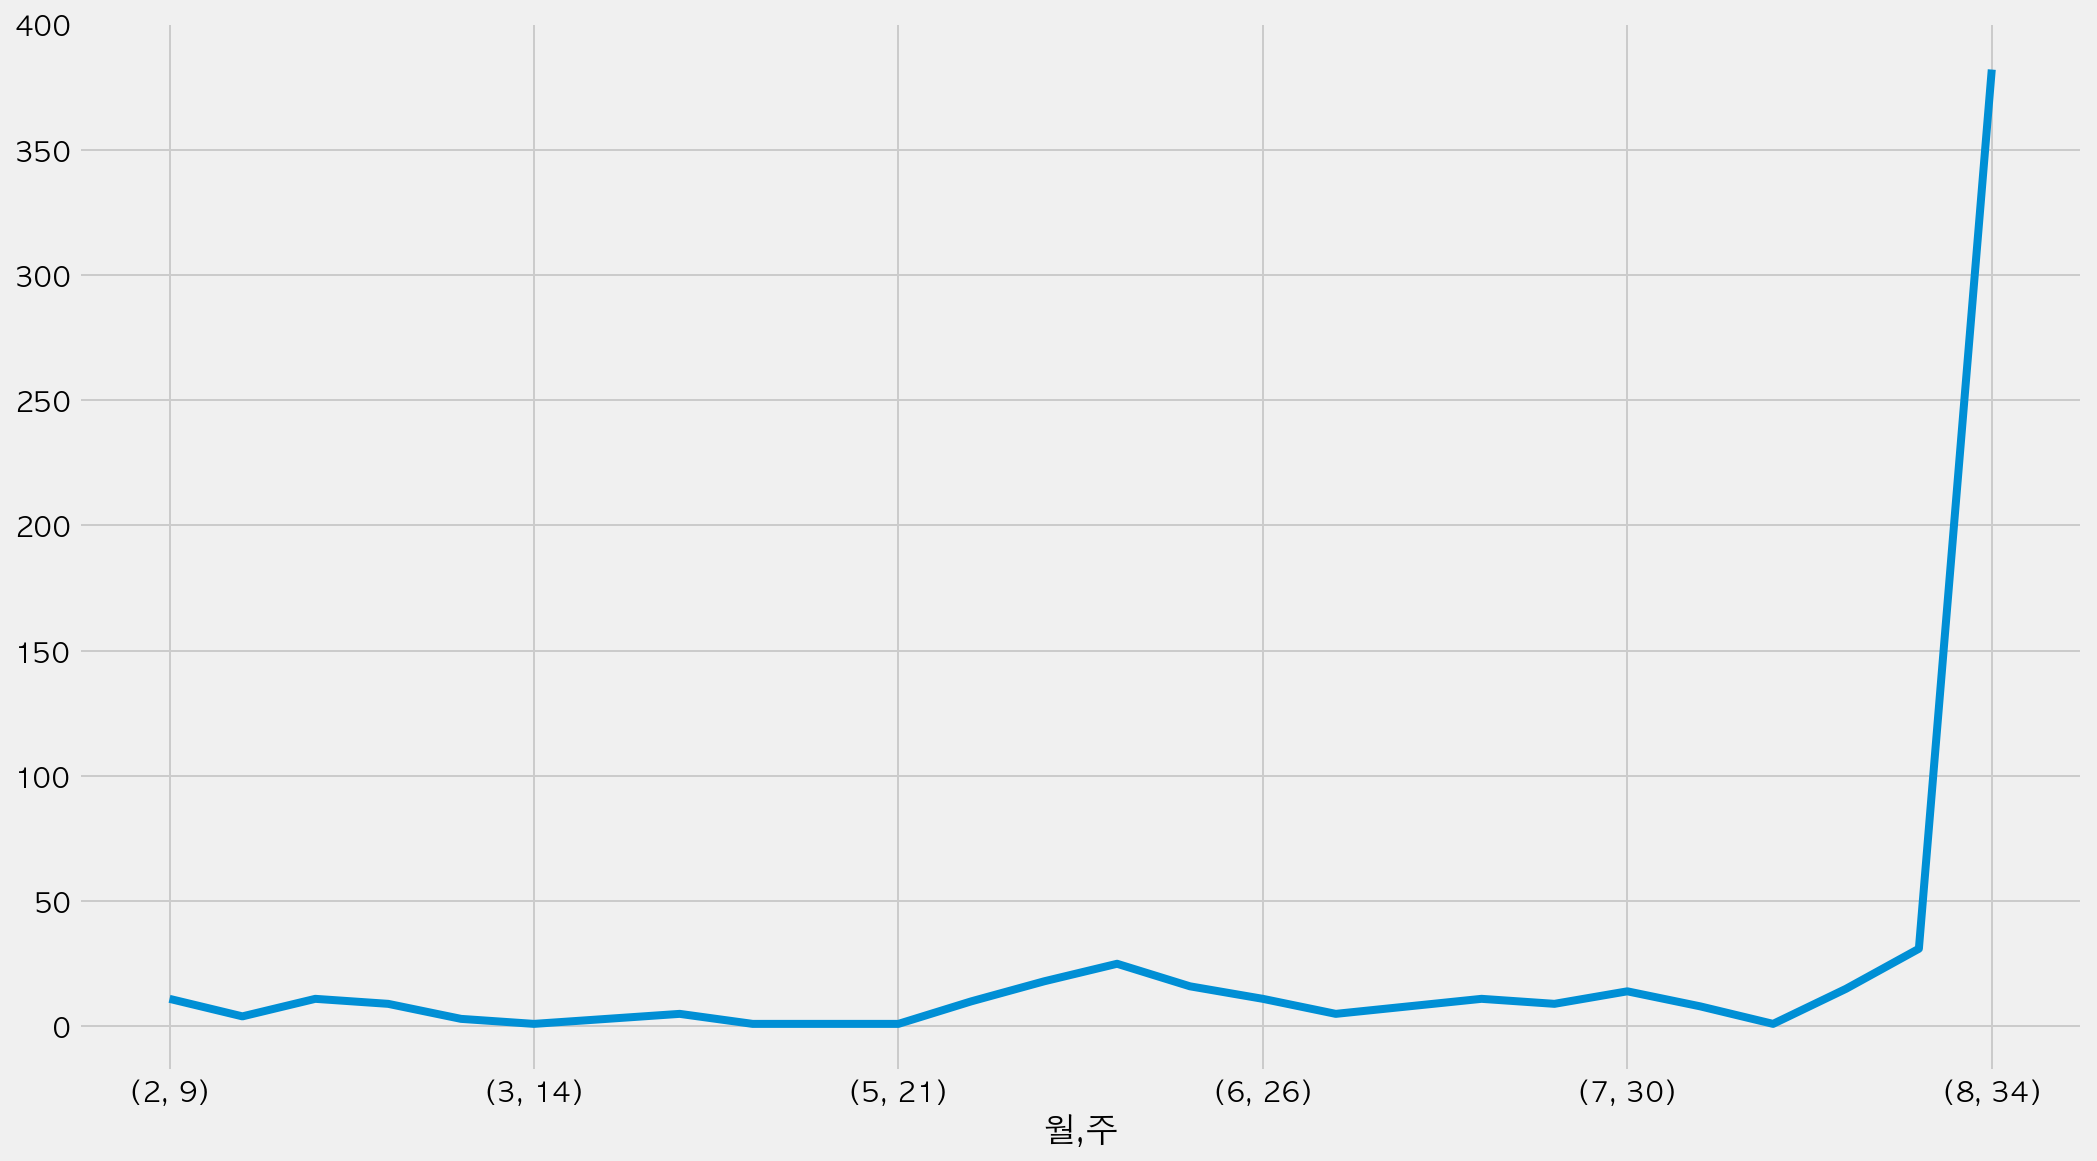

In [39]:
untracked_weekly_case = df_untracked.groupby(["월","주"])["연번"].count()
untracked_weekly_case.plot(figsize=(16,9))

In [40]:
all_weekly_case = df["주"].value_counts().to_frame()
all_weekly_case.columns = ["전체확진자수"]
all_weekly_case.head()

,전체확진자수
34,909
33,389
23,134
14,128
24,125


In [41]:
untracked_weekly_case = df_untracked["주"].value_counts().to_frame()
untracked_weekly_case.columns = ["불명확진수"]
untracked_weekly_case.head()

,불명확진수
34,382
33,31
24,25
23,18
25,16


In [42]:
comparison = all_weekly_case.merge(untracked_weekly_case, left_index=True, right_index=True).sort_index()
comparison

,전체확진자수,불명확진수
9,62,11
10,37,4
11,124,11
12,76,9
13,105,3
14,128,4
15,47,5
16,15,1
20,48,1
21,39,1


In [43]:
comparison[-4:]

,전체확진자수,불명확진수
31,38,9
32,76,15
33,389,31
34,909,382


<AxesSubplot:>

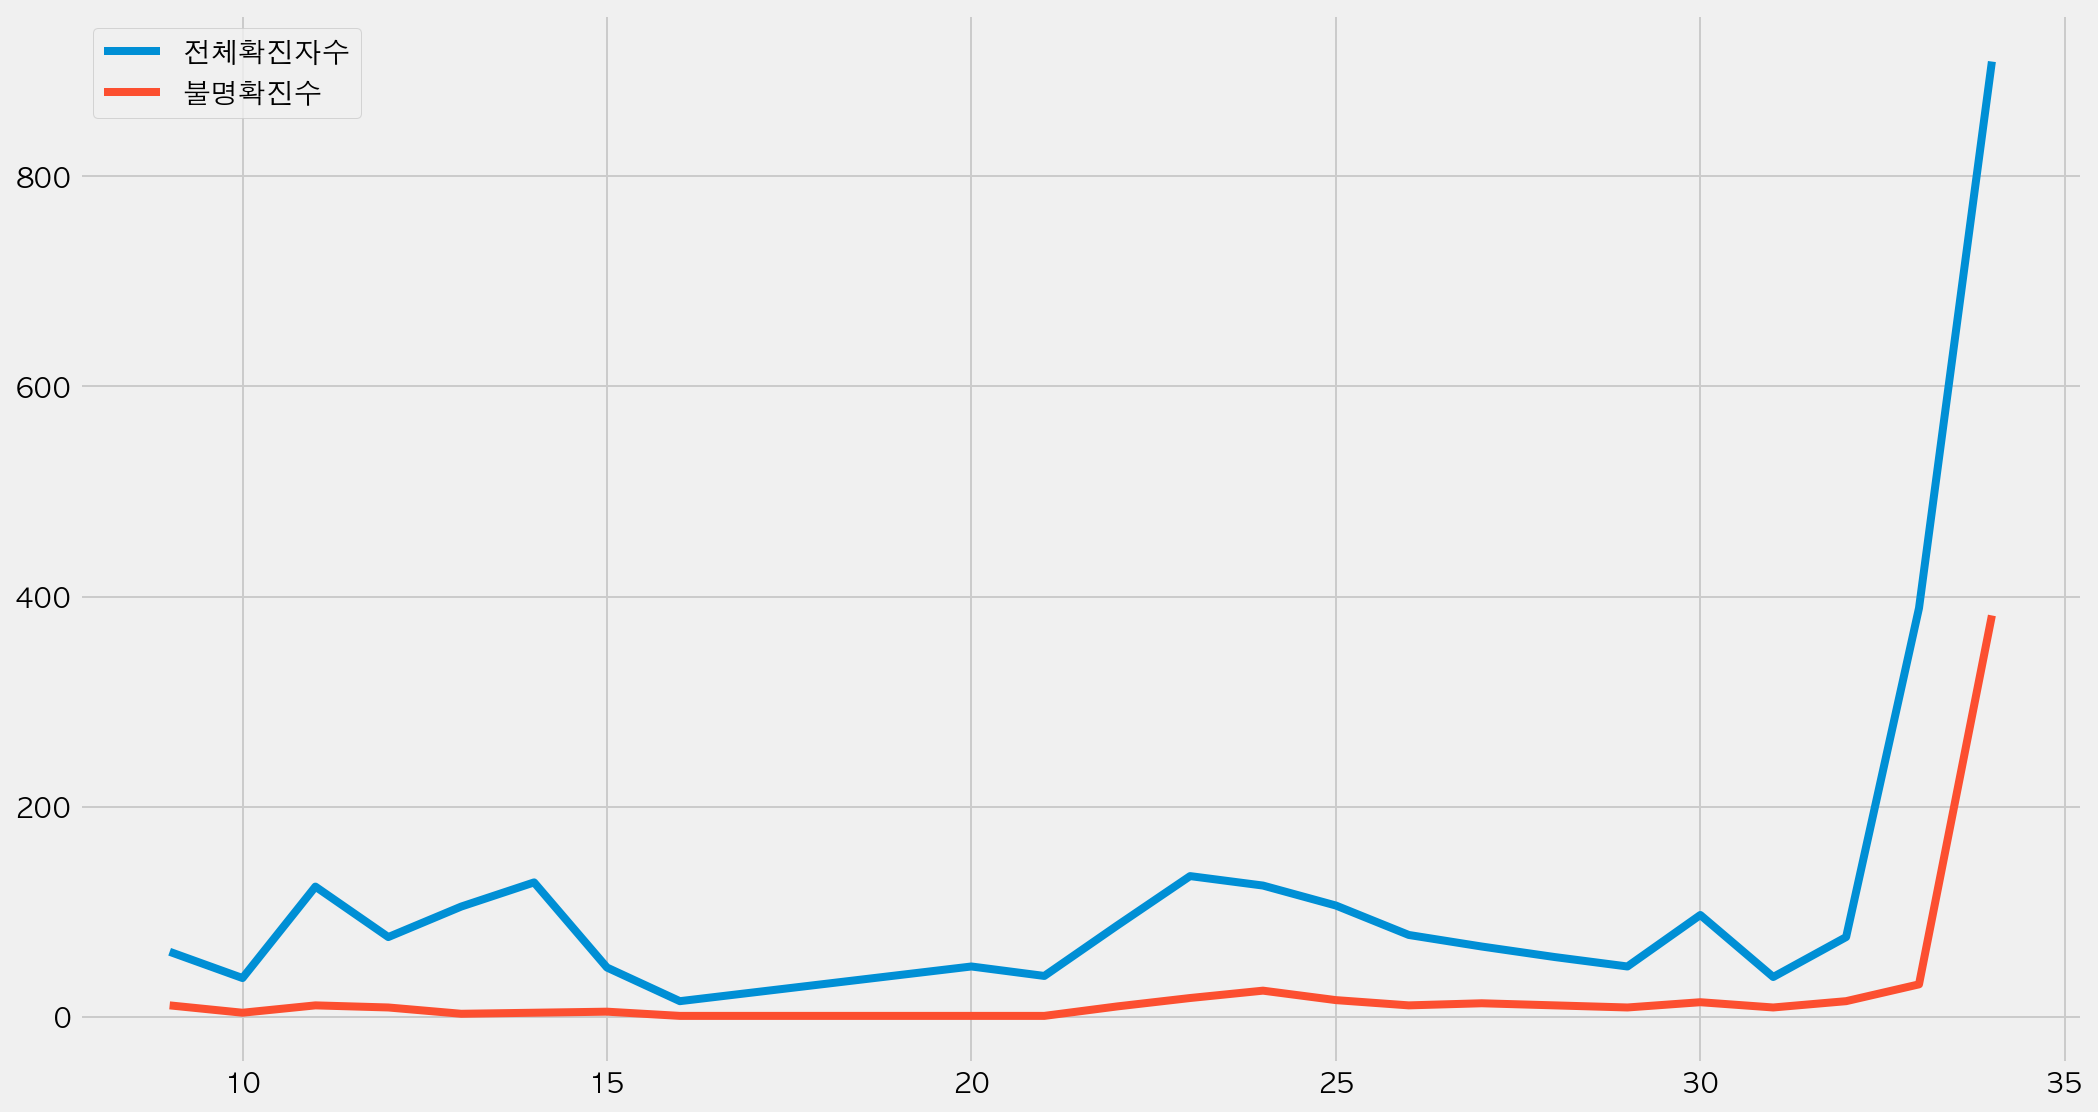

In [44]:
compare_graph = comparison.plot(figsize=(16,9))
compare_graph


In [45]:
fig_compare = compare_graph.get_figure()
fig_compare.savefig('./img/confirmed_vs_unconfirmed.png')

In [46]:
percentages = (comparison["불명확진수"] / comparison["전체확진자수"]) * 100
percentages

9     17.741935
10    10.810811
11     8.870968
12    11.842105
13     2.857143
14     3.125000
15    10.638298
16     6.666667
20     2.083333
21     2.564103
22    11.494253
23    13.432836
24    20.000000
25    15.094340
26    14.102564
27    19.402985
28    19.298246
29    18.750000
30    14.432990
31    23.684211
32    19.736842
33     7.969152
34    42.024202
dtype: float64

In [47]:
percentages[-4:]

31    23.684211
32    19.736842
33     7.969152
34    42.024202
dtype: float64

20.0
19.402985074626866
19.298245614035086
18.75
23.684210526315788
19.736842105263158
42.02420242024203


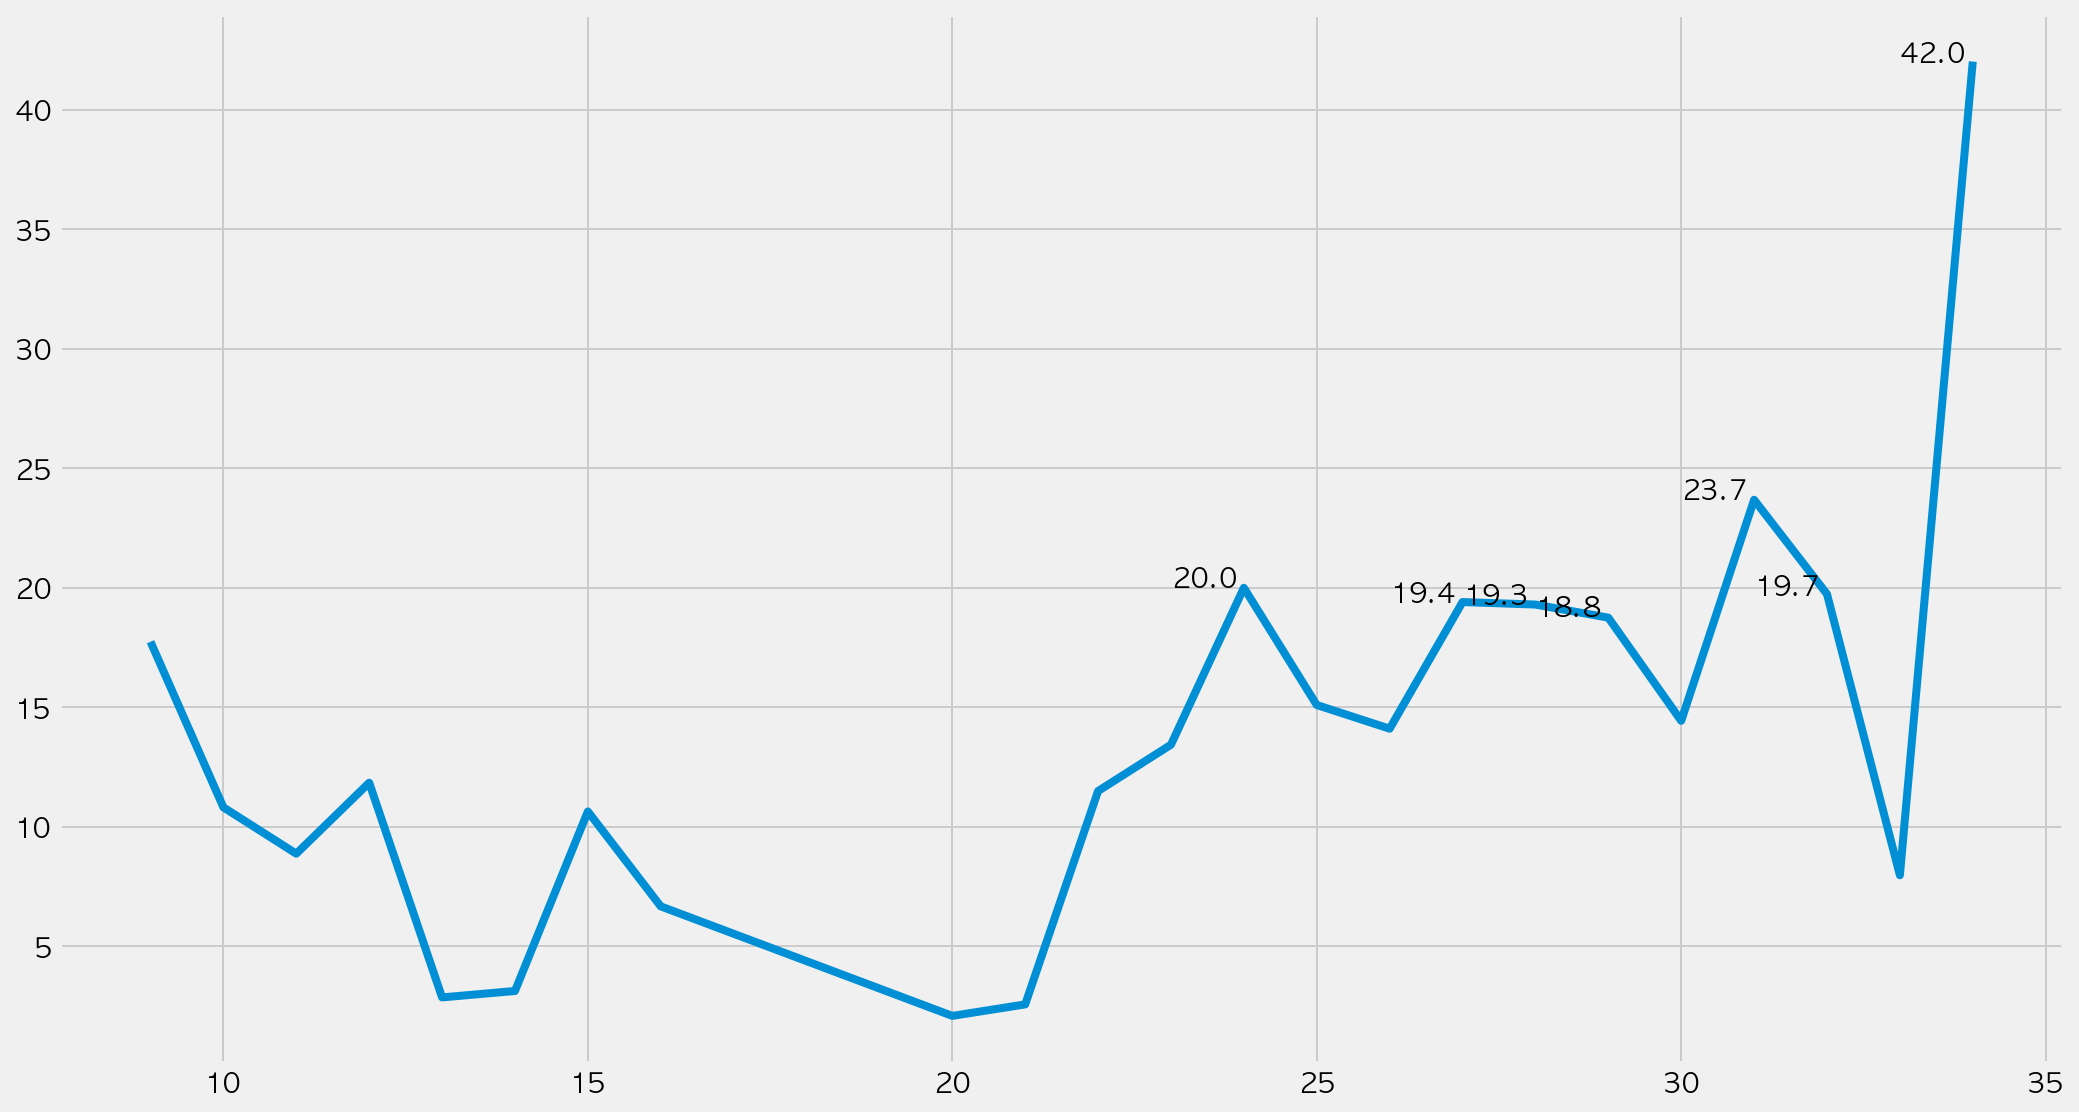

In [48]:
percentage_graph = percentages.plot(figsize=(16,9))

for i in range(len(percentages)):
    percent = percentages.iloc[i]
    percent = round(percent, 1)
    if percent > 18:
        print(percentages.iloc[i])
        percentage_graph.text(x=i+11, y=percent, s=percent)

In [49]:
fig = percentage_graph.get_figure()
fig.savefig('./img/unconfirmed_cases.png')